In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.preprocessing import LabelEncoder

In [37]:
data=pd.read_csv('archive (5)/Train.csv')
dftrain = data[data.columns[:-1]]
y = data[data.columns[-1]]


In [38]:
col=dftrain.columns


In [39]:
dftrain[col[1]].fillna(value=dftrain[col[1]].mean(),inplace=True) # for Item_Weight


C:\Users\pc\AppData\Local\Temp\ipykernel_6180\2303542770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftrain[col[1]].fillna(value=dftrain[col[1]].mean(),inplace=True) # for Item_Weight


In [40]:
dftrain[col[8]].value_counts()


Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [41]:
dftrain['New']=dftrain['Outlet_Size'].map({'Small':1,'Medium':2,'High':3})  #mapping for Categ. var. Outlet_Size is col[8]


In [42]:
dftrain.drop('Outlet_Size',axis=1,inplace=True)


In [43]:
dftrain.rename(columns={'New':'Outlet_Size'},inplace=True)


In [44]:
dftrain['Outlet_Size'].fillna(value=dftrain['Outlet_Size'].mean(),inplace=True) #Outlet_Size has 0 Null/NaN values 


In [45]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Outlet_Size                8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [46]:
categorical_columns = [x for x in dftrain.dtypes.index if dftrain.dtypes[x]=='object']
categorical_columns

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Location_Type',
 'Outlet_Type']

In [47]:
categorical_columns=[x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier','source']]
categorical_columns

['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type']

In [48]:
for x in categorical_columns:
    print("\n frequency of %s"%x)
    print(dftrain[x].value_counts())


 frequency of Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

 frequency of Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

 frequency of Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

 frequency of Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


In [49]:
dftrain['Item_type_combined']=dftrain['Item_Identifier'].apply(lambda x:x[0:2])
dftrain['Item_type_combined']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: Item_type_combined, Length: 8523, dtype: object

In [50]:
dftrain['Item_type_combined']=dftrain['Item_type_combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
dftrain['Item_type_combined']

0                 Food
1               Drinks
2                 Food
3                 Food
4       Non-Consumable
             ...      
8518              Food
8519              Food
8520    Non-Consumable
8521              Food
8522            Drinks
Name: Item_type_combined, Length: 8523, dtype: object

In [51]:
dftrain['Item_type_combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_type_combined, dtype: int64

In [52]:
dftrain['Item_Fat_Content']=dftrain['Item_Fat_Content'].map({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat','Regular':'Regular','Low Fat':'Low Fat'})
dftrain['Item_Fat_Content']

0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 8523, dtype: object

In [53]:
le = LabelEncoder()
dftrain['Item_Fat_Content'] = le.fit_transform(dftrain['Item_Fat_Content'])
dftrain.Item_Fat_Content

0       0
1       1
2       0
3       1
4       0
       ..
8518    0
8519    1
8520    0
8521    1
8522    0
Name: Item_Fat_Content, Length: 8523, dtype: int32

In [54]:
dftrain['Item_type_combined'] = le.fit_transform(dftrain['Item_type_combined'])
dftrain.Item_type_combined.value_counts()

1    6125
2    1599
0     799
Name: Item_type_combined, dtype: int64

In [55]:
dftrain.Item_Identifier

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

In [56]:
dftrain['Item_Identifier'] = le.fit_transform(dftrain['Item_Identifier'])


In [57]:
dftrain.Item_Identifier

0        156
1          8
2        662
3       1121
4       1297
        ... 
8518     370
8519     897
8520    1357
8521     681
8522      50
Name: Item_Identifier, Length: 8523, dtype: int32

In [58]:
corr=dftrain.corr()


In [59]:
round(corr,2)*100

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_type_combined
Item_Identifier,100.0,4.0,-11.0,-3.0,1.0,-1.0,-0.0,79.0
Item_Weight,4.0,100.0,-2.0,-1.0,2.0,-1.0,1.0,6.0
Item_Fat_Content,-11.0,-2.0,100.0,5.0,1.0,0.0,0.0,-17.0
Item_Visibility,-3.0,-1.0,5.0,100.0,-0.0,-7.0,-8.0,-4.0
Item_MRP,1.0,2.0,1.0,-0.0,100.0,1.0,-0.0,3.0
Outlet_Establishment_Year,-1.0,-1.0,0.0,-7.0,1.0,100.0,-27.0,-1.0
Outlet_Size,-0.0,1.0,0.0,-8.0,-0.0,-27.0,100.0,0.0
Item_type_combined,79.0,6.0,-17.0,-4.0,3.0,-1.0,0.0,100.0


In [60]:
sns.pairplot(dftrain)

In [61]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int32  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int32  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Outlet_Size                8523 non-null   float64
 11  Item_type_combined         8523 non-null   int32  
dtypes: float64(4), int32(3), int64(1), object(4)
memory usage: 699.3+ KB


In [62]:
for c in dftrain.columns:
    if dftrain[c].dtype=='O':
        label_encoder = LabelEncoder()
        dftrain[c]= label_encoder.fit_transform(dftrain[c])

[[-9.99997792e-01 -4.18904575e-04  1.21961692e-04  2.92687074e-06
   1.68376809e-04 -1.81669611e-03  5.43262035e-05  2.38075299e-04
  -6.61578445e-06  2.08809463e-06  1.85902466e-06 -9.15221151e-04]
 [-1.81698985e-03  1.64848791e-03  5.78849036e-05 -8.24811918e-07
   2.23401408e-03  9.99994210e-01  1.57034879e-04  7.10359821e-04
   2.23451763e-06 -2.52011833e-05 -4.68706886e-05  1.86183642e-04]
 [-2.43530394e-04  5.34282759e-03 -8.39572788e-05  4.66839591e-04
  -3.01782798e-03  7.13300073e-04 -3.06068042e-02 -9.99211699e-01
   9.58109304e-03  1.16948937e-02  1.92920677e-02 -8.15225198e-05]
 [-1.99856799e-04  7.44863201e-01 -1.19035947e-02 -3.80531877e-04
   6.67062635e-01 -2.71921114e-03 -5.55634670e-03  2.17734185e-03
   1.44875622e-03  1.88434105e-04  1.25934128e-03  4.20049585e-03]
 [-4.03804194e-04  6.67120314e-01  1.11882712e-02  2.38247335e-04
  -7.44807643e-01  5.59533318e-04 -6.95028832e-03  6.03557943e-03
   5.23684360e-04 -9.04070187e-04  6.22105311e-04  3.70506446e-04]
 [-4.

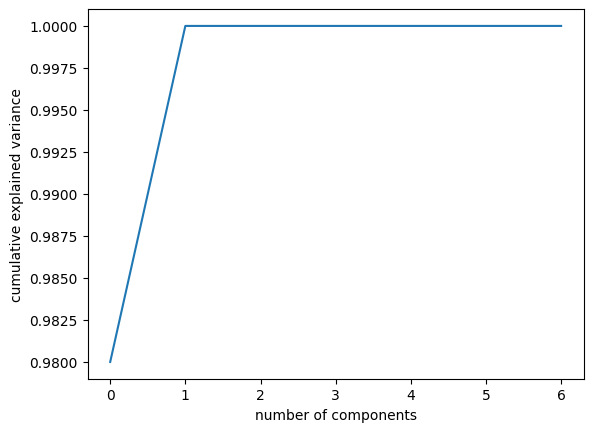

In [64]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)  # I have selected 7 components to test as main features

X = pca.fit_transform(dftrain)
y = dftrain[col[10]]
print(pca.components_)
print(pca.explained_variance_ratio_.round(2))
plt.plot(np.cumsum(pca.explained_variance_ratio_.round(2)))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show();

In [79]:
import imp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler



X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)


scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#X = pd.DataFrame(data,columns=)


In [80]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_true=y_test,y_pred=y_pred)

0.9312901899434554

In [85]:

reg = Pipeline([('poly', PolynomialFeatures(degree=6)),
                  ('linear', LinearRegression(fit_intercept=False))])

reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_true=y_test,y_pred=y_pred)

1.0